In [1]:
# Code Versions: Multi-step predictions
# Data 1: Crypto Dataset (Bitcoin & Ethereum)
# Version 1: Linear Regression vs Quantile Regression (Baseline)

# 	Data: 	BTC - univariate & multivariate
#			ETH - univariate & multivariate

In [179]:
# import libraries 
import pandas as pd                                          # for reading dataset
import numpy as np
from sklearn.model_selection import train_test_split         # for shuffling & splitting data

from sklearn.linear_model import LinearRegression            # for model fitting
from sklearn.metrics import mean_absolute_percentage_error   # for model evaluation

import matplotlib.pyplot as plt                              # for results visualisation

In [3]:
## READ DATA
Bitcoin = pd.read_csv('data/coin_Bitcoin.csv')

In [4]:
## DATA PREPARATION
Bitcoin["Date"] = pd.to_datetime(Bitcoin["Date"]).dt.normalize() # Changing Date to appropriate format (Object -> datetime64[ns])

In [5]:
Close_Price = Bitcoin.iloc[:, 7].copy() # we are only interested in close price

In [6]:
def split_series(series, input_size, output_size, train_ratio, seed):
    # 1. split univariate series to input (X) and output (y)
    X, y = [], []  
    for i in range(len(series) - input_size - output_size + 1):
        X.append(series[i:i + input_size])                            # X = input e.g. [10, 20, 30]
        y.append(series[i + input_size:i + input_size + output_size]) # y = output e.g. [40, 50]
    # 2. shuffle batches and split into train/test
    X_train, X_test, Y_train, Y_test = train_test_split(X, y, train_size = train_ratio, random_state=seed)
    
    return X_train, X_test, Y_train, Y_test

In [7]:
# Usage
input_size = 5        # 5 steps input
output_size = 3       # 3 steps output
train_ratio = 0.8
seed = 5925

In [8]:
X_train, X_test, y_train, y_test = split_series(Close_Price, input_size, output_size, train_ratio, seed)

In [9]:
model = LinearRegression()

In [10]:
model.fit(X_train, y_train)

LinearRegression()

In [11]:
y_pred = model.predict(X_test)

In [12]:
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"MAPE on test set: {mape}")

MAPE on test set: 0.07810330281850204


In [13]:
y_pred

array([[ 4231.79285837,  4284.90591801,  4297.72499205],
       [10111.04770038, 10150.54653853, 10209.97130869],
       [  456.72099377,   479.09813514,   490.49451797],
       ...,
       [ 8070.26469447,  8088.1661277 ,  8095.00099302],
       [  247.85945045,   270.23780071,   280.64987452],
       [  336.56464381,   357.31042696,   367.43524715]])

In [14]:
y_test

[2040    4278.846455
 2041    4017.268457
 2042    4214.671932
 Name: Close, dtype: float64,
 1675     9888.610352
 1676    10233.599609
 1677    10975.599609
 Name: Close, dtype: float64,
 960    465.321014
 961    454.933990
 962    456.078003
 Name: Close, dtype: float64,
 629    210.339005
 630    214.860992
 631    211.315002
 Name: Close, dtype: float64,
 2141    3951.599828
 2142    3905.227320
 2143    3909.156209
 Name: Close, dtype: float64,
 2506    7923.644703
 2507    7909.729393
 2508    7911.430129
 Name: Close, dtype: float64,
 2617    9143.582191
 2618    9190.854465
 2619    9137.993400
 Name: Close, dtype: float64,
 1321    774.650024
 1322    769.731018
 1323    780.086975
 Name: Close, dtype: float64,
 1182    661.284973
 1183    654.096985
 1184    651.783997
 Name: Close, dtype: float64,
 2068    3654.833539
 2069    3923.918594
 2070    3820.408682
 Name: Close, dtype: float64,
 2097    3599.765888
 2098    3602.460439
 2099    3583.965763
 Name: Close, dtype: f

In [15]:
time_steps = [1, 2, 3]

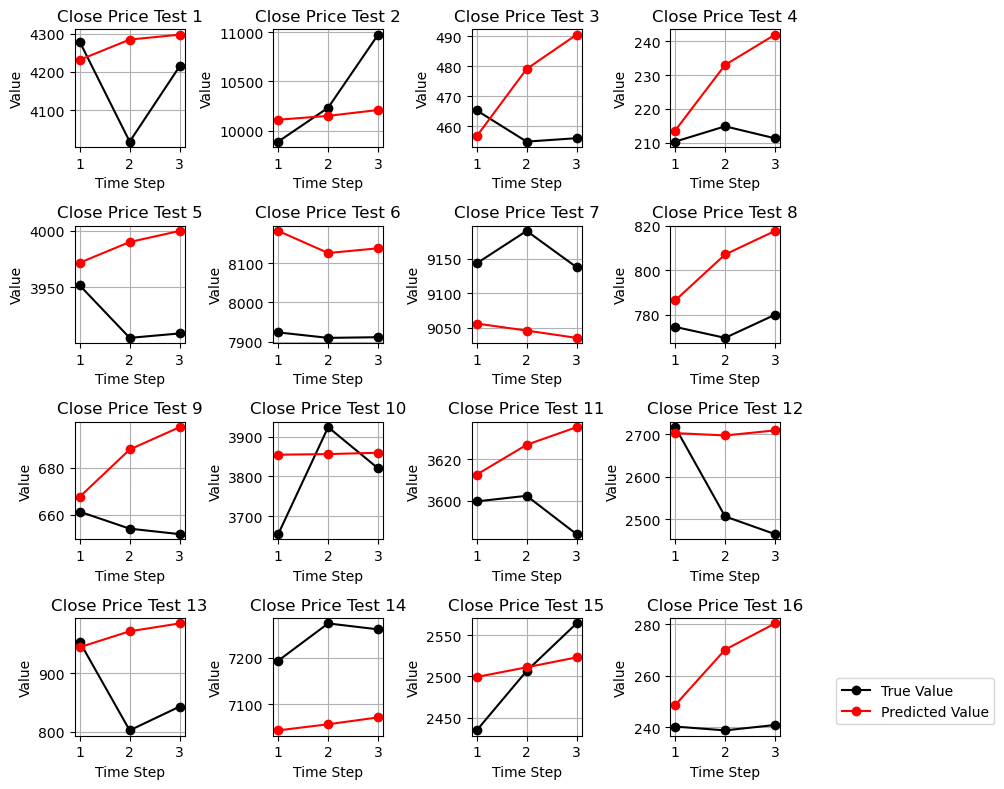

In [16]:
fig, axs = plt.subplots(4, 4, figsize=(8, 8))
axs = axs.flatten()
for i in range(16):
    ax = axs[i]
    ax.plot(time_steps, y_test[i], marker='o', linestyle='-', color='black', label='True Value')
    ax.plot(time_steps, y_pred[i], marker='o', linestyle='-', color='red', label='Predicted Value')
    ax.set_title(f'Close Price Test {i+1}')
    ax.set_xlabel('Time Step')
    ax.set_ylabel('Price (USD)')
    ax.grid(True)

# Adjust layout
plt.tight_layout()
plt.legend(bbox_to_anchor=(1.5, 0.5), borderaxespad=0.1)

# Show plot
plt.show()

In [17]:
num_experiments = 30 # ensure result is consistent
mape = []
seed = 5925

In [21]:
for i in range(num_experiments):
    seed += 1
    X_train, X_test, y_train, y_test = split_series(Close_Price, input_size, output_size, train_ratio, seed)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mape.append(mean_absolute_percentage_error(y_test, y_pred))
    print(f"Experiment {i+1}: MAPE on test set: {mape[i]}")

print(f"Univariate Linear Regression Avg MAPE: {np.mean(mape)*100:.3f}%")

Experiment 0: MAPE on test set: 0.0567695650446348
Experiment 1: MAPE on test set: 0.07635565260209538
Experiment 2: MAPE on test set: 0.06383722340121763
Experiment 3: MAPE on test set: 0.07310873991850857
Experiment 4: MAPE on test set: 0.06391005162502589
Experiment 5: MAPE on test set: 0.04321051889090469
Experiment 6: MAPE on test set: 0.07238416281285497
Experiment 7: MAPE on test set: 0.05026616248211952
Experiment 8: MAPE on test set: 0.051503702018626085
Experiment 9: MAPE on test set: 0.071059745117101
Experiment 10: MAPE on test set: 0.08044091197055943
Experiment 11: MAPE on test set: 0.055573254000241094
Experiment 12: MAPE on test set: 0.07384411822014782
Experiment 13: MAPE on test set: 0.05809004962157336
Experiment 14: MAPE on test set: 0.06963487207945007
Experiment 15: MAPE on test set: 0.06354914828614533
Experiment 16: MAPE on test set: 0.07172004520864693
Experiment 17: MAPE on test set: 0.07162849271718517
Experiment 18: MAPE on test set: 0.057564362526729834
Exp

In [23]:
## Quantile Regression - Univariate BTC

In [143]:
# Usage
input_size = 5        # 5 steps input
output_size = 3       # 3 steps output
train_ratio = 0.8
seed = 5925

In [145]:
X_train, X_test, y_train, y_test = split_series(Close_Price, input_size, output_size, train_ratio, seed)
X_train, X_test, y_train, y_test = np.array(X_train), np.array(X_test), np.array(y_train), np.array(y_test)

In [147]:
from scipy.optimize import minimize

In [149]:
# tilted loss function - crux of quantile regression
def tilted_loss(beta, X, y, tau):
    y_pred = np.dot(X, beta.reshape(X.shape[1], -1)) # multi step ahead version
    u = y - y_pred
    loss = np.where(u >= 0, tau * u, (tau - 1) * u)
    return np.sum(loss)

In [151]:
quantile = [0.05, 0.25, 0.5, 0.75, 0.95]

In [207]:
# Use a dictionary to store the results
results = {
    0.05: [],
    0.25: [],
    0.5:  [],
    0.75: [],
    0.95: []
}

In [209]:
# Minimize the tilted loss
for i in quantile:
    
    # Initial guess for beta (linear regression coefficients)
    initial_beta = np.zeros((X_train.shape[1], output_size)).flatten()
    result = minimize(tilted_loss, initial_beta, args=(X_train, y_train, i), method='BFGS')
    beta_hat = result.x.reshape(X_train.shape[1], output_size)
    # Evaluate the model
    y_pred_train = np.dot(X_train, beta_hat)
    y_pred_test = np.dot(X_test, beta_hat)

    # Calculate the tilted loss on the test set
    test_loss = tilted_loss(beta_hat.flatten(), X_test, y_test, i)
    
    # print("Optimal Beta:", beta_hat)
    # print("Test Loss:", test_loss)

    results[i] = y_pred_test

    # Print first few predictions for inspection
    print(f"Quantile {i}: First few test predictions")
    print(y_pred_test[:5])

print('Actual Values: First few test predictions')
print(y_test[:5])

Quantile 0.05: First few test predictions
[[4015.75269855 3916.36871458 3695.00963212]
 [9475.92474756 9042.0054792  8898.16809303]
 [ 416.50298091  399.58948275  388.76786516]
 [ 181.99729583  182.79755171  177.88188814]
 [3696.62251899 3591.55692415 3481.68935104]]
Quantile 0.25: First few test predictions
[[4175.18660904 4150.52966442 4142.06404743]
 [9899.53908747 9807.01358377 9823.27448616]
 [ 436.11358129  430.33549329  429.39164844]
 [ 194.89956297  193.69680712  189.31472608]
 [3887.84215108 3844.99267061 3818.36180416]]
Quantile 0.5: First few test predictions
[[ 4232.15028314  4250.05514049  4245.95374725]
 [10088.72670424 10196.78462278 10142.54609482]
 [  444.32924027   445.28967387   444.57499515]
 [  200.78549976   200.5167959    199.81792561]
 [ 3968.2845498   3974.13001739  3967.01804005]]
Quantile 0.75: First few test predictions
[[ 4338.43742948  4364.9980913   4434.27693192]
 [10286.55082248 10500.6648918  10542.96686692]
 [  454.25497603   462.98241196   465.206280

In [211]:
results[0.05]

array([[4015.75269855, 3916.36871458, 3695.00963212],
       [9475.92474756, 9042.0054792 , 8898.16809303],
       [ 416.50298091,  399.58948275,  388.76786516],
       ...,
       [7522.15534448, 7301.61218953, 7123.39059309],
       [ 220.76459845,  215.11558261,  206.03537652],
       [ 300.30549112,  292.02831183,  284.55079294]])

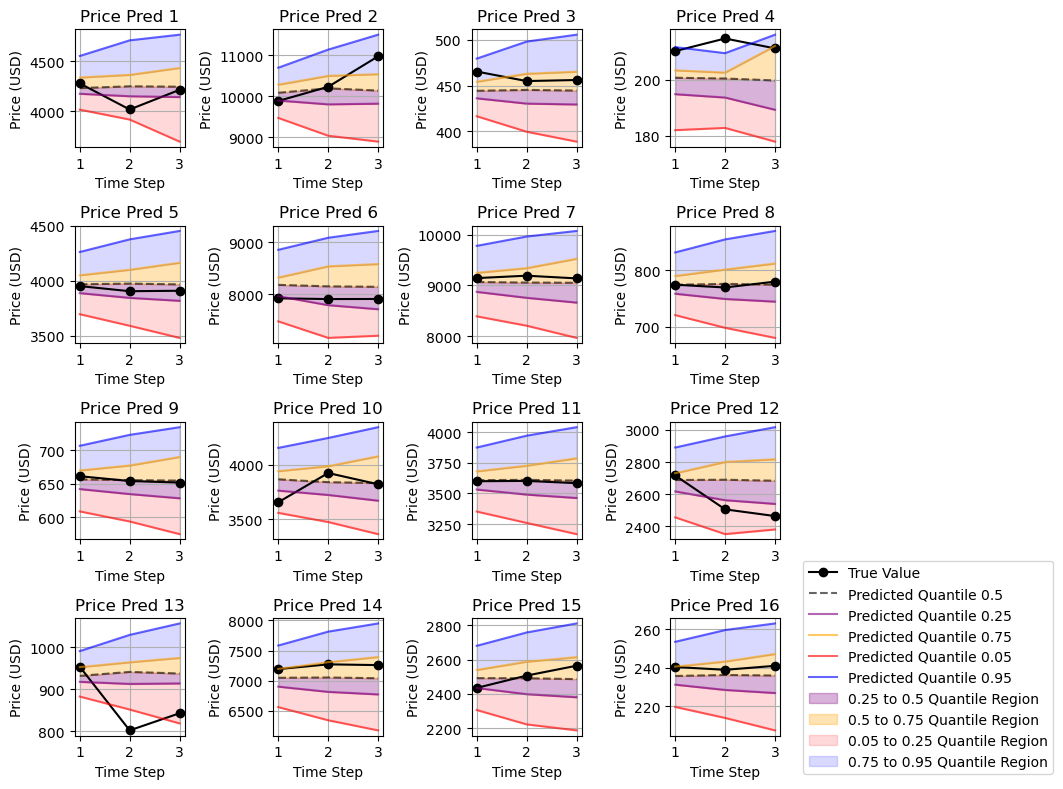

In [305]:
time_steps = [1, 2, 3]
fig, axs = plt.subplots(4, 4, figsize=(8, 8))
axs = axs.flatten()
for i in range(16):
    ax = axs[i]
    ax.plot(time_steps, y_test[i], marker='o', linestyle='-', color='black', label='True Value')
    ax.plot(time_steps, results[0.5][i], linestyle='--', color='black', label='Predicted Quantile 0.5', alpha=0.6)
    ax.plot(time_steps, results[0.25][i], linestyle='-', color='purple', label='Predicted Quantile 0.25', alpha=0.6)
    ax.plot(time_steps, results[0.75][i], linestyle='-', color='orange', label='Predicted Quantile 0.75', alpha=0.6)
    ax.plot(time_steps, results[0.05][i], linestyle='-', color='red', label='Predicted Quantile 0.05', alpha=0.6)
    ax.plot(time_steps, results[0.95][i], linestyle='-', color='blue', label='Predicted Quantile 0.95', alpha=0.6)
    
    # Highlight regions between quantiles
    ax.fill_between(time_steps, results[0.25][i], results[0.5][i], color='purple', alpha=0.3, label='0.25 to 0.5 Quantile Region')
    ax.fill_between(time_steps, results[0.5][i], results[0.75][i], color='orange', alpha=0.3, label='0.5 to 0.75 Quantile Region')
    ax.fill_between(time_steps, results[0.05][i], results[0.25][i], color='red', alpha=0.15, label='0.05 to 0.25 Quantile Region')
    ax.fill_between(time_steps, results[0.75][i], results[0.95][i], color='blue', alpha=0.15, label='0.75 to 0.95 Quantile Region')

    ax.set_title(f'Price Pred {i+1}')
    ax.set_xlabel('Time Step')
    ax.set_ylabel('Price (USD)')
    ax.grid(True)

plt.tight_layout()
plt.legend(bbox_to_anchor=(1.2, 1.5), borderaxespad=0.1)
plt.show()

In [338]:
num_experiments = 30
seed = 5925
mape = []

In [340]:
quantile = [0.05, 0.25, 0.5, 0.75, 0.95]

In [342]:
for i in range(num_experiments):
    seed += 1
    X_train, X_test, y_train, y_test = split_series(Close_Price, input_size, output_size, train_ratio, seed)
    X_train, X_test, y_train, y_test = np.array(X_train), np.array(X_test), np.array(y_train), np.array(y_test)

    results = {
        0.05: [],
        0.25: [],
        0.5:  [],
        0.75: [],
        0.95: []
    }

    for q in quantile:
        initial_beta = np.zeros((X_train.shape[1], output_size)).flatten()
        result = minimize(tilted_loss, initial_beta, args=(X_train, y_train, q), method='BFGS')
        beta_hat = result.x.reshape(X_train.shape[1], output_size)
        y_pred_train = np.dot(X_train, beta_hat)       # Evaluate the model
        y_pred_test = np.dot(X_test, beta_hat)
        test_loss = tilted_loss(beta_hat.flatten(), X_test, y_test, q)
        results[q] = y_pred_test

    mape.append(mean_absolute_percentage_error(y_test, results[0.5]))
    print(f"Experiment {i+1} MAPE on test set: {mape[i]}")

print(f"Univariate Linear Regression Avg MAPE - Quantile Ver: {np.mean(mape)*100:.3f}%")

Experiment 1 MAPE on test set: 0.038984075116046846
Experiment 2 MAPE on test set: 0.039199972070977904
Experiment 3 MAPE on test set: 0.039381115942114304
Experiment 4 MAPE on test set: 0.04162766482301545
Experiment 5 MAPE on test set: 0.039333616385785385
Experiment 6 MAPE on test set: 0.03930451037359394
Experiment 7 MAPE on test set: 0.03802825817664097
Experiment 8 MAPE on test set: 0.03796533839272396
Experiment 9 MAPE on test set: 0.0380958877143216
Experiment 10 MAPE on test set: 0.03854587681869582
Experiment 11 MAPE on test set: 0.04021188801394667
Experiment 12 MAPE on test set: 0.03671617799672389
Experiment 13 MAPE on test set: 0.036820960981331204
Experiment 14 MAPE on test set: 0.04018525623277108
Experiment 15 MAPE on test set: 0.037603699390126116
Experiment 16 MAPE on test set: 0.03951395467336475
Experiment 17 MAPE on test set: 0.04000277141626918
Experiment 18 MAPE on test set: 0.03728760057530229
Experiment 19 MAPE on test set: 0.03668180802227344
Experiment 20 MA

In [ ]:
## BTC - multivariate version
## linear regression

In [462]:
data = Bitcoin.iloc[:, 4:]

In [492]:
features = data[['High', 'Low', 'Open', 'Volume', 'Marketcap']]
target = data['Close']

In [466]:
input_size = 5        # 5 steps input
output_size = 3       # 3 steps output
train_ratio = 0.8
seed = 5925

In [494]:
def split_data(data, input_size, output_size, train_ratio, seed):
    X, y = [], [] 
    total_size = input_size + output_size
    for i in range(len(data) - total_size + 1):
        X.append(features[i:i + input_size])                            
        y.append(target[i + input_size:i + total_size])        
    # 2. shuffle batches and split into train/test
    X_train, X_test, Y_train, Y_test = train_test_split(X, y, train_size = train_ratio, random_state=seed)
    
    return X_train, X_test, Y_train, Y_test

In [526]:
X_train, X_test, y_train, y_test = split_data(data, input_size, output_size, train_ratio, seed)
X_train, X_test, y_train, y_test = np.array(X_train), np.array(X_test), np.array(y_train), np.array(y_test)

In [528]:
X_train.shape # we have to reshape the input data to fit the model

(2387, 5, 5)

In [530]:
X_test.shape

(597, 5, 5)

In [534]:
y_train.shape

(2387, 3)

In [536]:
y_test.shape

(597, 3)

In [538]:
X_train_reshaped = X_train.reshape(X_train.shape[0], -1)
X_test_reshaped = X_test.reshape(X_test.shape[0], -1)

In [540]:
model = LinearRegression()
model.fit(X_train_reshaped, y_train)

LinearRegression()

In [544]:
y_pred = model.predict(X_test_reshaped)

In [546]:
y_pred

array([[ 4209.60625344,  4284.64488608,  4266.63905511],
       [ 9961.35169952,  9922.65305388, 10063.08940233],
       [  443.63991134,   458.34885199,   481.685151  ],
       ...,
       [ 8038.58923838,  8206.18252326,  8202.05713639],
       [  240.87625883,   252.77469068,   255.28544233],
       [  332.82298302,   343.45986789,   343.52839801]])

In [548]:
y_test

array([[ 4278.84645524,  4017.26845712,  4214.67193177],
       [ 9888.61035156, 10233.59960938, 10975.59960938],
       [  465.3210144 ,   454.93399048,   456.07800293],
       ...,
       [ 8192.49400532,  8144.19451744,  8827.76442606],
       [  257.3210144 ,   234.82499695,   233.84300232],
       [  320.04598999,   328.20599365,   352.68399048]])

In [550]:
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"MAPE on test set: {mape}")

MAPE on test set: 0.0628879547792754


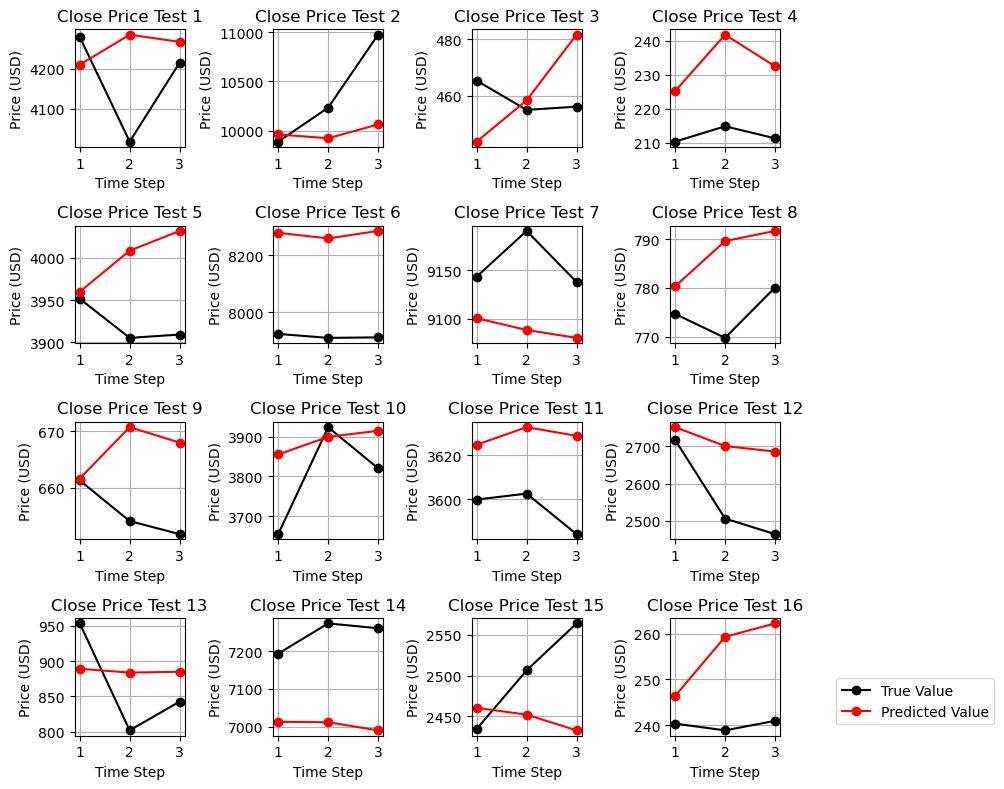

In [552]:
time_steps = [1, 2, 3]
fig, axs = plt.subplots(4, 4, figsize=(8, 8))
axs = axs.flatten()
for i in range(16):
    ax = axs[i]
    ax.plot(time_steps, y_test[i], marker='o', linestyle='-', color='black', label='True Value')
    ax.plot(time_steps, y_pred[i], marker='o', linestyle='-', color='red', label='Predicted Value')
    ax.set_title(f'Close Price Test {i+1}')
    ax.set_xlabel('Time Step')
    ax.set_ylabel('Price (USD)')
    ax.grid(True)

# Adjust layout
plt.tight_layout()
plt.legend(bbox_to_anchor=(1.5, 0.5), borderaxespad=0.1)

# Show plot
plt.show()

In [ ]:
# Notice that first point prediction is pretty freaking good, accuracy drops off with further time steps
# That is to be expected, is there a way to measure this?

# How do you determine the size of input/output?
# What is a good way to evaluate quantile regression model? MAPE only compares the median with actual data, what about the other quantiles?

In [554]:
num_experiments = 30 # ensure result is consistent
mape = []
seed = 5925

In [556]:
for i in range(num_experiments):
    seed += 1
    X_train, X_test, y_train, y_test = split_data(data, input_size, output_size, train_ratio, seed)
    X_train, X_test, y_train, y_test = np.array(X_train), np.array(X_test), np.array(y_train), np.array(y_test)
    X_train_reshaped = X_train.reshape(X_train.shape[0], -1)
    X_test_reshaped = X_test.reshape(X_test.shape[0], -1)
    model = LinearRegression()
    model.fit(X_train_reshaped, y_train)
    y_pred = model.predict(X_test_reshaped)
    mape.append(mean_absolute_percentage_error(y_test, y_pred))
    print(f"Experiment {i+1}: MAPE on test set: {mape[i]}")

print(f"Univariate Linear Regression Avg MAPE: {np.mean(mape)*100:.3f}%")

Experiment 1: MAPE on test set: 0.06648456668960269
Experiment 2: MAPE on test set: 0.0669816767464708
Experiment 3: MAPE on test set: 0.0561965418877223
Experiment 4: MAPE on test set: 0.06108107848841893
Experiment 5: MAPE on test set: 0.07057592226582794
Experiment 6: MAPE on test set: 0.04920992766699298
Experiment 7: MAPE on test set: 0.04768426895793185
Experiment 8: MAPE on test set: 0.06199272733669022
Experiment 9: MAPE on test set: 0.053220564465848365
Experiment 10: MAPE on test set: 0.06605246732795671
Experiment 11: MAPE on test set: 0.04515789057724489
Experiment 12: MAPE on test set: 0.04992807646753481
Experiment 13: MAPE on test set: 0.058313761529097397
Experiment 14: MAPE on test set: 0.047743146732395915
Experiment 15: MAPE on test set: 0.06320691796323674
Experiment 16: MAPE on test set: 0.04746218985125051
Experiment 17: MAPE on test set: 0.06495466011527438
Experiment 18: MAPE on test set: 0.060774056486895656
Experiment 19: MAPE on test set: 0.06077504621350654


In [ ]:
## Multivariate case: Quantile Regression version

In [574]:
data = Bitcoin.iloc[:, 4:]

features = data[['High', 'Low', 'Open', 'Volume', 'Marketcap']]
target = data['Close']

input_size = 5        # 5 steps input
output_size = 3       # 3 steps output
train_ratio = 0.8
seed = 5925

In [576]:
def split_data(data, input_size, output_size, train_ratio, seed):
    X, y = [], [] 
    total_size = input_size + output_size
    for i in range(len(data) - total_size + 1):
        X.append(features[i:i + input_size])                            
        y.append(target[i + input_size:i + total_size])        
    # 2. shuffle batches and split into train/test
    X_train, X_test, Y_train, Y_test = train_test_split(X, y, train_size = train_ratio, random_state=seed)
    
    return X_train, X_test, Y_train, Y_test

In [592]:
X_train, X_test, y_train, y_test = split_data(data, input_size, output_size, train_ratio, seed)
X_train, X_test, y_train, y_test = np.array(X_train), np.array(X_test), np.array(y_train), np.array(y_test)
# reshaping works - but results are terrible
X_train_reshaped = X_train.reshape(X_train.shape[0], -1)
X_test_reshaped = X_test.reshape(X_test.shape[0], -1)

In [580]:
from scipy.optimize import minimize

In [596]:
# tilted loss function - crux of quantile regression
def tilted_loss(beta, X, y, tau):
    y_pred = np.dot(X, beta.reshape(X.shape[1], -1)) # multi step ahead version
    u = y - y_pred
    loss = np.where(u >= 0, tau * u, (tau - 1) * u)
    return np.sum(loss)


quantile = [0.05, 0.25, 0.5, 0.75, 0.95]

# Use a dictionary to store the results
results = {
    0.05: [],
    0.25: [],
    0.5:  [],
    0.75: [],
    0.95: []
}

In [598]:
# Minimize the tilted loss
for i in quantile:
    
    # Initial guess for beta (linear regression coefficients)
    initial_beta = np.zeros((X_train_reshaped.shape[1], output_size)).flatten()
    result = minimize(tilted_loss, initial_beta, args=(X_train_reshaped, y_train, i), method='BFGS')
    beta_hat = result.x.reshape((X_train_reshaped.shape[1], output_size))
    # Evaluate the model
    y_pred_train = np.dot(X_train_reshaped, beta_hat)
    y_pred_test = np.dot(X_test_reshaped, beta_hat)

    # Calculate the tilted loss on the test set
    test_loss = tilted_loss(beta_hat.flatten(), X_test_reshaped, y_test, i)
    
    # print("Optimal Beta:", beta_hat)
    # print("Test Loss:", test_loss)

    results[i] = y_pred_test

    # Print first few predictions for inspection
    print(f"Quantile {i}: First few test predictions")
    print(y_pred_test[:5])

print('Actual Values: First few test predictions')
print(y_test[:5])

Quantile 0.05: First few test predictions
[[2951.89774706 2893.38904858 2896.84872283]
 [6049.85113403 6076.22609654 6022.25601601]
 [ 249.16757729  243.92360947  242.52701768]
 [ 109.45995472  103.78497395  104.69769983]
 [3131.66647658 3058.83141117 3063.55642319]]
Quantile 0.25: First few test predictions
[[3321.52381809 3206.67480953 3226.26929302]
 [7011.07463353 6657.98196462 6710.94936547]
 [ 286.67909125  271.2734143   272.71385689]
 [ 124.32566542  117.97578466  118.45044627]
 [3531.4975305  3458.40176533 3477.40754468]]
Quantile 0.5: First few test predictions
[[3410.24648264 3590.77332029 3676.91410792]
 [7465.88253381 7905.15746715 8132.71028696]
 [ 308.89158829  330.68473003  338.85922751]
 [ 132.89157099  142.6764671   145.76762863]
 [3518.96701207 3670.13756882 3757.15841459]]
Quantile 0.75: First few test predictions
[[ 9317.91559036  9317.91559036  9317.91559036]
 [20852.13514112 20852.13514112 20852.13514112]
 [  878.23779109   878.23779109   878.23779109]
 [  377.870

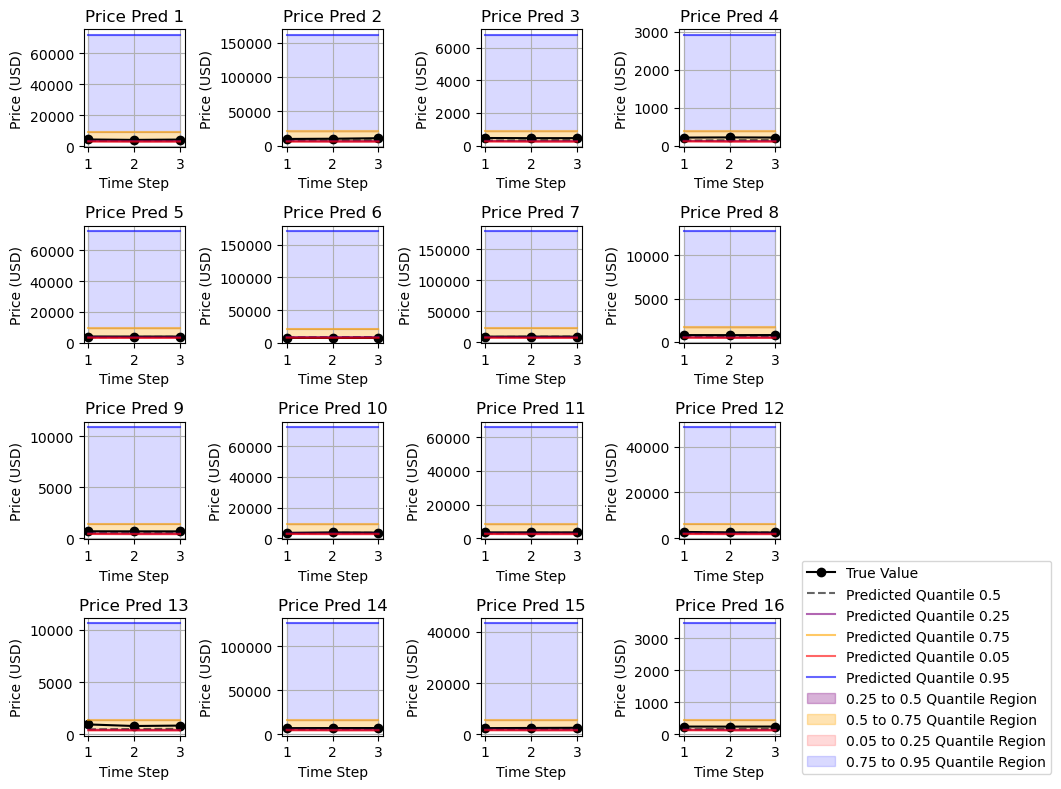

In [786]:
time_steps = [1, 2, 3]
fig, axs = plt.subplots(4, 4, figsize=(8, 8))
axs = axs.flatten()
for i in range(16):
    ax = axs[i]
    ax.plot(time_steps, y_test[i], marker='o', linestyle='-', color='black', label='True Value')
    ax.plot(time_steps, results[0.5][i], linestyle='--', color='black', label='Predicted Quantile 0.5', alpha=0.6)
    ax.plot(time_steps, results[0.25][i], linestyle='-', color='purple', label='Predicted Quantile 0.25', alpha=0.6)
    ax.plot(time_steps, results[0.75][i], linestyle='-', color='orange', label='Predicted Quantile 0.75', alpha=0.6)
    ax.plot(time_steps, results[0.05][i], linestyle='-', color='red', label='Predicted Quantile 0.05', alpha=0.6)
    ax.plot(time_steps, results[0.95][i], linestyle='-', color='blue', label='Predicted Quantile 0.95', alpha=0.6)
    
    # Highlight regions between quantiles
    ax.fill_between(time_steps, results[0.25][i], results[0.5][i], color='purple', alpha=0.3, label='0.25 to 0.5 Quantile Region')
    ax.fill_between(time_steps, results[0.5][i], results[0.75][i], color='orange', alpha=0.3, label='0.5 to 0.75 Quantile Region')
    ax.fill_between(time_steps, results[0.05][i], results[0.25][i], color='red', alpha=0.15, label='0.05 to 0.25 Quantile Region')
    ax.fill_between(time_steps, results[0.75][i], results[0.95][i], color='blue', alpha=0.15, label='0.75 to 0.95 Quantile Region')

    ax.set_title(f'Price Pred {i+1}')
    ax.set_xlabel('Time Step')
    ax.set_ylabel('Price (USD)')
    ax.grid(True)

plt.tight_layout()
plt.legend(bbox_to_anchor=(1.2, 1.5), borderaxespad=0.1)
plt.show()

In [796]:
num_experiments = 30
seed = 5925
mape = []
quantile = [0.05, 0.25, 0.5, 0.75, 0.95]

In [798]:
for i in range(num_experiments):
    seed += 1
    X_train, X_test, y_train, y_test = split_data(data, input_size, output_size, train_ratio, seed)
    X_train, X_test, y_train, y_test = np.array(X_train), np.array(X_test), np.array(y_train), np.array(y_test)
    X_train_reshaped = X_train.reshape(X_train.shape[0], -1)
    X_test_reshaped = X_test.reshape(X_test.shape[0], -1)

    results = {
        0.05: [],
        0.25: [],
        0.5:  [],
        0.75: [],
        0.95: []
    }

    for q in quantile:
        initial_beta = np.zeros((X_train_reshaped.shape[1], output_size)).flatten()
        result = minimize(tilted_loss, initial_beta, args=(X_train_reshaped, y_train, q), method='BFGS')
        beta_hat = result.x.reshape((X_train_reshaped.shape[1], output_size))
        y_pred_train = np.dot(X_train_reshaped, beta_hat)
        y_pred_test = np.dot(X_test_reshaped, beta_hat)
        test_loss = tilted_loss(beta_hat.flatten(), X_test_reshaped, y_test, q)
        results[q] = y_pred_test

    mape.append(mean_absolute_percentage_error(y_test, results[0.5]))
    print(f"Experiment {i+1} MAPE on test set: {mape[i]}")

print(f"Univariate Linear Regression Avg MAPE - Quantile Ver: {np.mean(mape)*100:.3f}%")

Experiment 1 MAPE on test set: 0.20271640860473927
Experiment 2 MAPE on test set: 0.20670781409645742
Experiment 3 MAPE on test set: 0.20559830295488812
Experiment 4 MAPE on test set: 0.2092856509318778
Experiment 5 MAPE on test set: 0.20898689787614966
Experiment 6 MAPE on test set: 0.19534097887428778
Experiment 7 MAPE on test set: 0.2037130213049669
Experiment 8 MAPE on test set: 0.20112176867109532
Experiment 9 MAPE on test set: 0.202967571087316
Experiment 10 MAPE on test set: 0.20326392135669324
Experiment 11 MAPE on test set: 0.20072661381887294
Experiment 12 MAPE on test set: 0.20630212374949997
Experiment 13 MAPE on test set: 0.19609423628238787
Experiment 14 MAPE on test set: 0.20520182716402433
Experiment 15 MAPE on test set: 0.19504322568709298
Experiment 16 MAPE on test set: 0.19991610835447074
Experiment 17 MAPE on test set: 0.20151955388868803
Experiment 18 MAPE on test set: 0.20495395426104354
Experiment 19 MAPE on test set: 0.2002711245039277
Experiment 20 MAPE on test

In [948]:
from sklearn.preprocessing import MinMaxScaler

In [950]:
# Never give up...
data = Bitcoin.iloc[:, 4:]

features = data[['High', 'Low', 'Open', 'Volume', 'Marketcap']]
features = MinMaxScaler().fit_transform(features)
target = data['Close']

input_size = 5        # 5 steps input
output_size = 3       # 3 steps output
train_ratio = 0.8
seed = 5925

def split_data(data, input_size, output_size, train_ratio, seed):
    X, y = [], [] 
    total_size = input_size + output_size
    for i in range(len(data) - total_size + 1):
        X.append(features[i:i + input_size])                            
        y.append(target[i + input_size:i + total_size])        
    # 2. shuffle batches and split into train/test
    X_train, X_test, Y_train, Y_test = train_test_split(X, y, train_size = train_ratio, random_state=seed)
    
    return X_train, X_test, Y_train, Y_test

X_train, X_test, y_train, y_test = split_data(data, input_size, output_size, train_ratio, seed)
X_train, X_test, y_train, y_test = np.array(X_train), np.array(X_test), np.array(y_train), np.array(y_test)
X_train_reshaped = X_train.reshape(X_train.shape[0], -1)
X_test_reshaped = X_test.reshape(X_test.shape[0], -1)

from scipy.optimize import minimize

quantile = [0.05, 0.25, 0.5, 0.75, 0.95]

# Use a dictionary to store the results
results = {
    0.05: [],
    0.25: [],
    0.5:  [],
    0.75: [],
    0.95: []
}

In [952]:
def tilted_loss(beta, X, y, tau):
    y_pred = np.dot(X, beta.reshape(X.shape[1], y.shape[1]))    
    u = y - y_pred
    loss = np.where(u >= 0, tau * u, (tau - 1) * u)
    return np.sum(loss)

In [954]:
for i in quantile:
    initial_beta = np.zeros((X_train.shape[1] * X_train.shape[2], output_size)).flatten()
    result = minimize(tilted_loss, initial_beta, args=(X_train_reshaped, y_train, i), method = 'BFGS')
    beta_hat = result.x.reshape((X_train_reshaped.shape[1], output_size))
    
    # Evaluate the model
    y_pred_train = np.dot(X_train_reshaped, beta_hat)
    y_pred_test = np.dot(X_test_reshaped, beta_hat)

    # Calculate the tilted loss on the test set
    test_loss = tilted_loss(beta_hat.flatten(), X_test_reshaped, y_test, i)
    
    # print("Optimal Beta:", beta_hat)
    # print("Test Loss:", test_loss)

    results[i] = y_pred_test

    # Print first few predictions for inspection
    print(f"Quantile {i}: First few test predictions")
    print(y_pred_test[:5])

print('Actual Values: First few test predictions')
print(y_test[:5])

Quantile 0.05: First few test predictions
[[4001.59986582 4039.00946758 3678.02493097]
 [9490.56289833 9075.73396393 8709.9564205 ]
 [ 350.89110155  346.4679958   323.86118832]
 [ 116.98062429  119.97913831   93.44956722]
 [3759.19662684 3656.30523334 3600.77532846]]
Quantile 0.25: First few test predictions
[[4091.9114843  4035.45127588 3949.67371475]
 [9783.49861494 9562.08504791 9712.39434276]
 [ 371.62121802  357.98925534  374.00221564]
 [ 134.44182097  120.05757156  125.74620536]
 [3896.29348581 3904.46392489 3855.84326272]]
Quantile 0.5: First few test predictions
[[ 4205.86583514  4232.91305668  4290.02146557]
 [10112.37849699 10260.10089997 10261.6494744 ]
 [  383.68866597   390.50988515   389.69357042]
 [  138.51761535   144.15057945   150.7186408 ]
 [ 3952.24132393  3967.49624125  3991.83699149]]
Quantile 0.75: First few test predictions
[[ 4353.74316392  4416.89661887  4450.55156449]
 [10510.37713003 10731.06463721 10914.3606256 ]
 [  403.20354316   406.9426511    412.757330

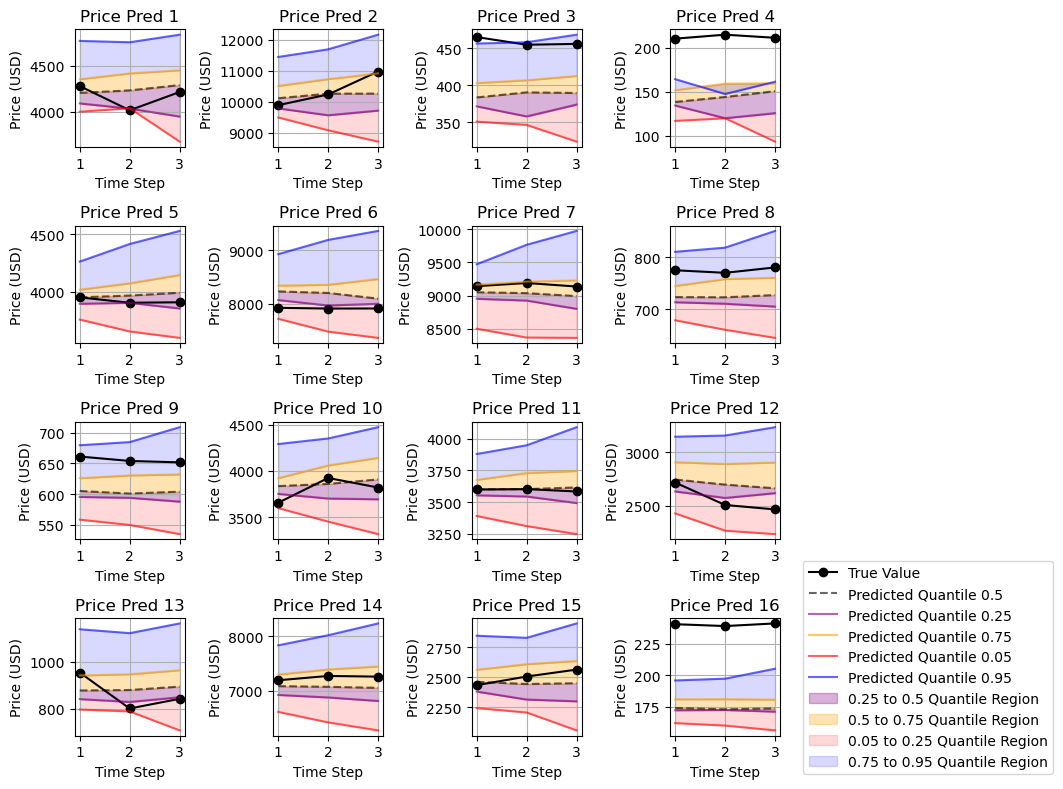

In [955]:
time_steps = [1, 2, 3]
fig, axs = plt.subplots(4, 4, figsize=(8, 8))
axs = axs.flatten()
for i in range(16):
    ax = axs[i]
    ax.plot(time_steps, y_test[i], marker='o', linestyle='-', color='black', label='True Value')
    ax.plot(time_steps, results[0.5][i], linestyle='--', color='black', label='Predicted Quantile 0.5', alpha=0.6)
    ax.plot(time_steps, results[0.25][i], linestyle='-', color='purple', label='Predicted Quantile 0.25', alpha=0.6)
    ax.plot(time_steps, results[0.75][i], linestyle='-', color='orange', label='Predicted Quantile 0.75', alpha=0.6)
    ax.plot(time_steps, results[0.05][i], linestyle='-', color='red', label='Predicted Quantile 0.05', alpha=0.6)
    ax.plot(time_steps, results[0.95][i], linestyle='-', color='blue', label='Predicted Quantile 0.95', alpha=0.6)
    
    # Highlight regions between quantiles
    ax.fill_between(time_steps, results[0.25][i], results[0.5][i], color='purple', alpha=0.3, label='0.25 to 0.5 Quantile Region')
    ax.fill_between(time_steps, results[0.5][i], results[0.75][i], color='orange', alpha=0.3, label='0.5 to 0.75 Quantile Region')
    ax.fill_between(time_steps, results[0.05][i], results[0.25][i], color='red', alpha=0.15, label='0.05 to 0.25 Quantile Region')
    ax.fill_between(time_steps, results[0.75][i], results[0.95][i], color='blue', alpha=0.15, label='0.75 to 0.95 Quantile Region')

    ax.set_title(f'Price Pred {i+1}')
    ax.set_xlabel('Time Step')
    ax.set_ylabel('Price (USD)')
    ax.grid(True)

plt.tight_layout()
plt.legend(bbox_to_anchor=(1.2, 1.5), borderaxespad=0.1)
plt.show()

In [ ]:
# Normalising features makes results MUCH better
# Multivariate nature - feature selection is probably needed in order to perform better than univariate
# because there are "noise" variables

In [960]:
mape = mean_absolute_percentage_error(y_test, results[0.5])
print(f"Univariate Linear Regression Avg MAPE - Quantile Ver: {mape*100:.3f} %")
# Normalised, features = data[['High', 'Low', 'Open', 'Volume', 'Marketcap']]

Univariate Linear Regression Avg MAPE - Quantile Ver: 12.396 %


In [962]:
data = Bitcoin.iloc[:, 4:]

features = data[['High', 'Low', 'Open', 'Volume']]
features = MinMaxScaler().fit_transform(features)
target = data['Close']

input_size = 5        # 5 steps input
output_size = 3       # 3 steps output
train_ratio = 0.8
seed = 5925

def split_data(data, input_size, output_size, train_ratio, seed):
    X, y = [], [] 
    total_size = input_size + output_size
    for i in range(len(data) - total_size + 1):
        X.append(features[i:i + input_size])                            
        y.append(target[i + input_size:i + total_size])        
    # 2. shuffle batches and split into train/test
    X_train, X_test, Y_train, Y_test = train_test_split(X, y, train_size = train_ratio, random_state=seed)
    
    return X_train, X_test, Y_train, Y_test

X_train, X_test, y_train, y_test = split_data(data, input_size, output_size, train_ratio, seed)
X_train, X_test, y_train, y_test = np.array(X_train), np.array(X_test), np.array(y_train), np.array(y_test)
X_train_reshaped = X_train.reshape(X_train.shape[0], -1)
X_test_reshaped = X_test.reshape(X_test.shape[0], -1)

from scipy.optimize import minimize

quantile = [0.05, 0.25, 0.5, 0.75, 0.95]

# Use a dictionary to store the results
results = {
    0.05: [],
    0.25: [],
    0.5:  [],
    0.75: [],
    0.95: []
}

In [964]:
for i in quantile:
    initial_beta = np.zeros((X_train.shape[1] * X_train.shape[2], output_size)).flatten()
    result = minimize(tilted_loss, initial_beta, args=(X_train_reshaped, y_train, i), method = 'BFGS')
    beta_hat = result.x.reshape((X_train_reshaped.shape[1], output_size))
    
    # Evaluate the model
    y_pred_train = np.dot(X_train_reshaped, beta_hat)
    y_pred_test = np.dot(X_test_reshaped, beta_hat)

    # Calculate the tilted loss on the test set
    test_loss = tilted_loss(beta_hat.flatten(), X_test_reshaped, y_test, i)

    results[i] = y_pred_test

mape = mean_absolute_percentage_error(y_test, results[0.5])
print(f"Univariate Linear Regression Avg MAPE - Quantile Ver: {mape*100:.3f} %")
# Normalised, features = data[['High', 'Low', 'Open', 'Volume']]

Univariate Linear Regression Avg MAPE - Quantile Ver: 14.432 %
